## Details:
* Date - The date of the observation.
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

In [2]:
# !pip install dash
# !pip install plotly
# !pip install jupyter-dash

In [3]:

import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import datetime as dt
import pandas as pd
import numpy as np

# Univariate Analysis

In [5]:
#read the csv file
df = pd.read_csv('avocado.csv')
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

## Univariate Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [9]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Month_Name']=df['Date'].dt.month_name()
df['DAY']=df['Date'].dt.day
df['DAY_Name']=df['Date'].dt.day_name()

In [11]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month Month_Name  DAY DAY_Name  
0  Albany     12   December   27   Sunday  
1  Albany     12   December   20   Sunday  
2  Albany     12   December   13   Sunday  
3  Albany     12   December    6   Sunday  
4  Albany     11   November   29   Sunday

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int32         
 14  Month_Name    18249 non-null  object        
 15  DAY           18249 non-null  int32 

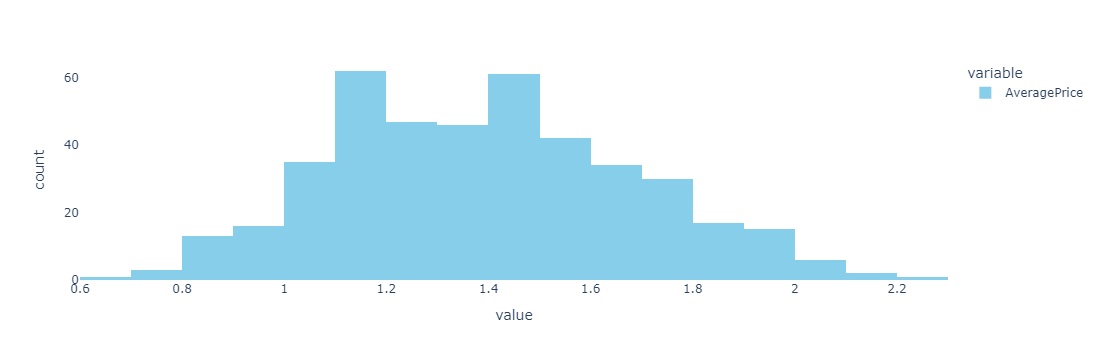

In [13]:
# Q1: check distribution of average price during Jan 2018
Jan_2018 =df[(df['Month']== 1) & (df['year']==2018)]
fig01 = px.histogram(Jan_2018['AveragePrice'])
fig01.update_traces(marker=dict(color='skyblue'))
fig01.update_layout( plot_bgcolor='white' )

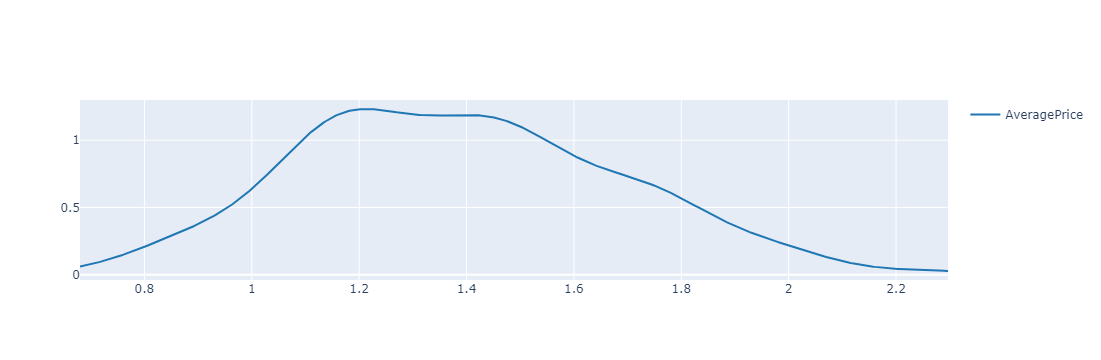

In [14]:
ff.create_distplot([Jan_2018.AveragePrice.to_list()],['AveragePrice'],show_hist = False,show_rug= False)

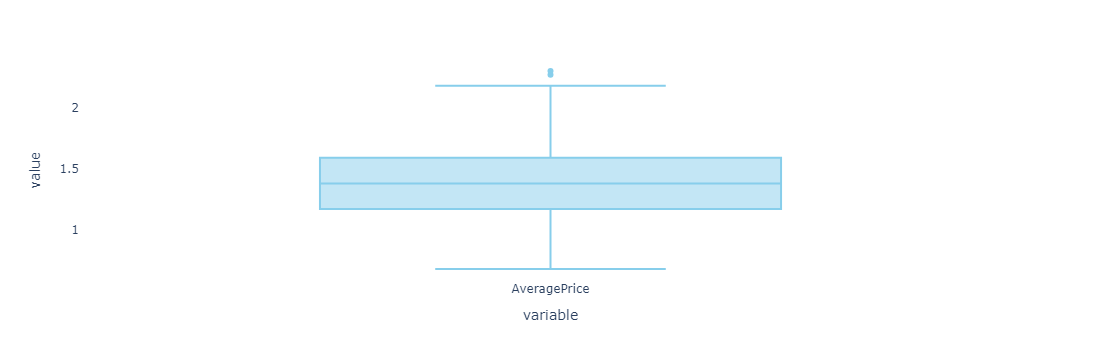

In [15]:
fig02 =px.box(Jan_2018['AveragePrice'])
fig02.update_traces(marker=dict(color='skyblue'))
fig02.update_layout(plot_bgcolor='white')

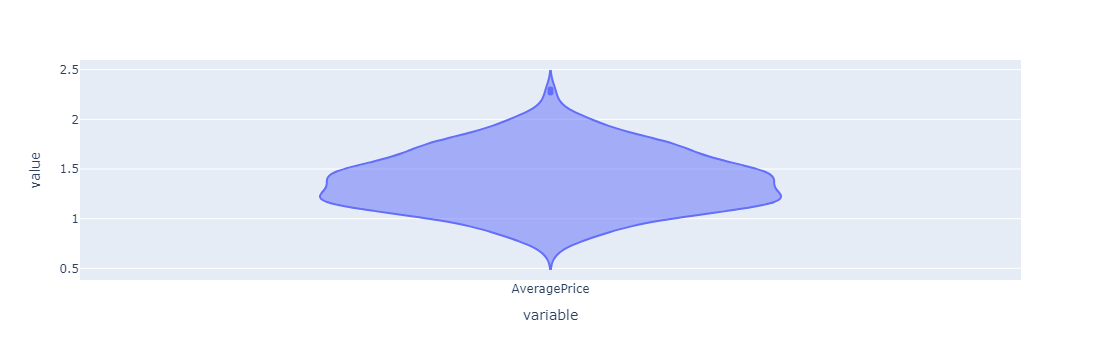

In [16]:
# Q2: using diffrent chart than you used in the previous one, plot the distribution for Jan 2018 Average price
px.violin(Jan_2018['AveragePrice'])

px.strip(Jan_2018['AveragePrice'])

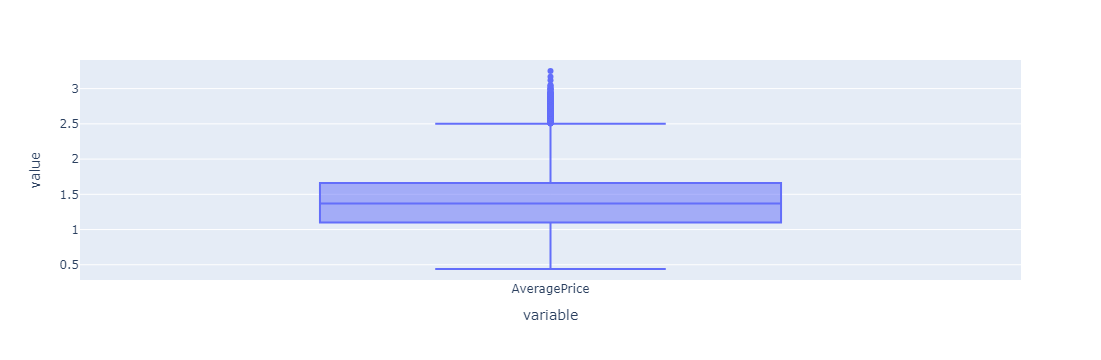

In [18]:
# Q3: Create box-plot for the Average price, but this time for all the "Average price" , and comment your conclusion
px.box(df['AveragePrice'])

- *Median*: The median of this data is *1.37*, which suggests that the data is approximately normally distributed.
- *Outlier**: There are noticeabl *Outliers** in the data.


# Bi/Multivariate

In [21]:
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0     2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1     2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2     2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3     2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4     2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...          ...           ...           ...      ...        ...     ...   
18244 2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  Month Month_Name  DAY DAY_Name  
0                Albany     12   December   27   Sunday  
1                Albany     12   December   20   Sunday  
2                Albany     12   December   13   Sunday  
3                Albany     12   December    6   Sunday  
4                Albany     11   November   29   Sunday  
...                 ...    ...        ...  ...      ...  
18244  WestTexNewMexico      2   February    4   Sunday  
18245  WestTexNewMexico      1    January   28   Sunday  
18246  WestTexNewMexico      1    January   21   Sunday  
18247  WestTexNewMexico      1    January   14   Sunday  
18248  WestTexNewMexico      1    January    7   Sunday  

[18249 rows x 17 columns]

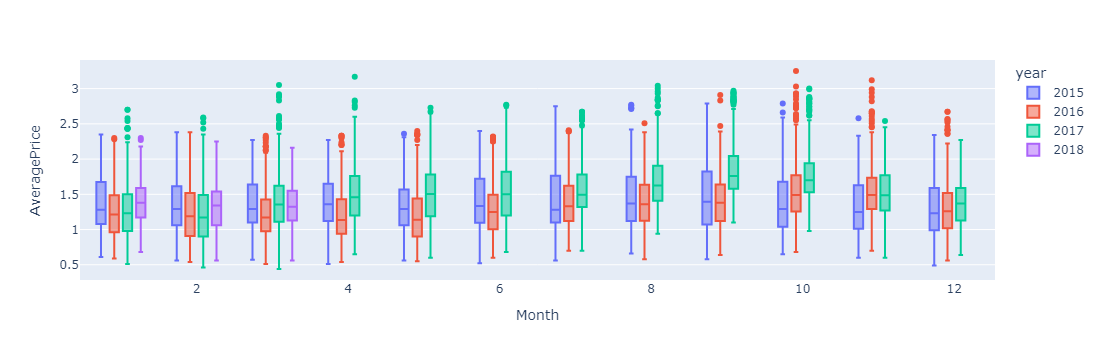

In [22]:
# Q4: Create a tracing boxplots (multiple box-plots in one figure) that shows the 
    # average price for each month and colored by year to distnguish between them
px.box(data_frame=df ,x='Month',y='AveragePrice',color='year')

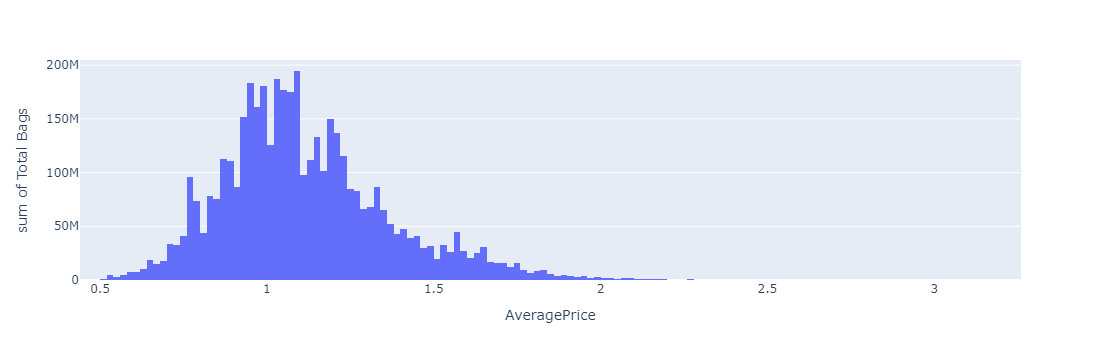

In [23]:
# Q5 : Create a joint plot, Average price on x axis and Total bags on y axis
px.histogram(data_frame=df ,y='Total Bags',x='AveragePrice')


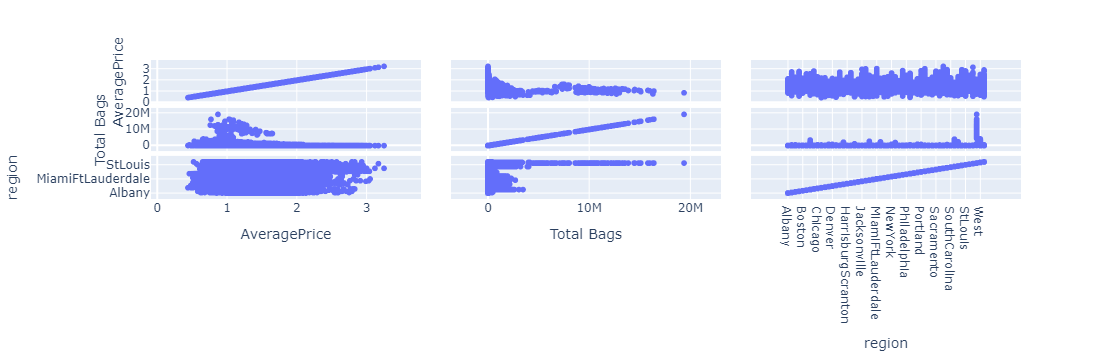

In [24]:
# Q6 : Create pair plot for 'AveragePrice', 'Total Bags' and 'region' features
px.scatter_matrix(df[['AveragePrice', 'Total Bags','region' ]])

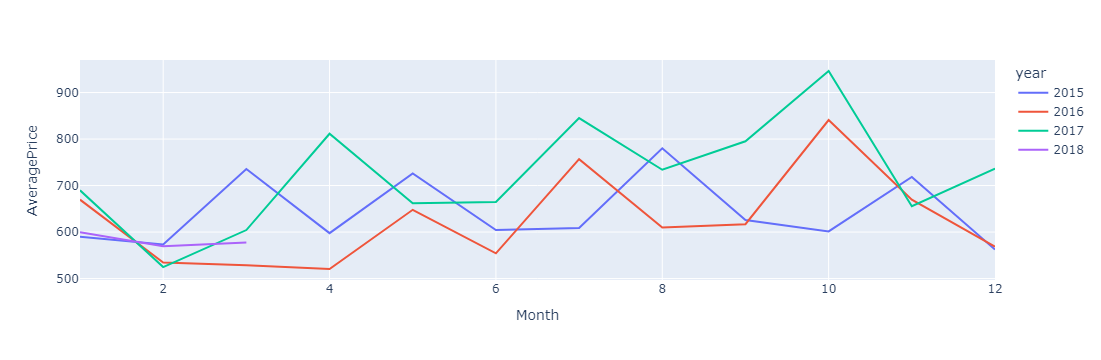

In [84]:
# Q7 : Create multiple line plots to compare between Average Price for each month for each year.
df4=df.groupby(['year','Month'])['AveragePrice'].sum().reset_index()
px.line(df4,x='Month',y='AveragePrice',color='year')

In [83]:
df2 = df.sort_values('month')

In [84]:
df2

Date  AveragePrice  Total Volume       4046       4225      4770  \
9124  2018-01-14          0.90     950954.60  463945.73  188126.02  11227.47   
8261  2017-01-29          1.36      71809.68    1270.55   44228.54    101.00   
8262  2017-01-22          1.52      79859.72    1341.00   52570.04     16.27   
8263  2017-01-15          1.40      68598.22    1109.08   37401.39     21.00   
8264  2017-01-08          1.43      67353.38    1221.37   41382.49     11.79   
...          ...           ...           ...        ...        ...       ...   
15377 2017-12-31          1.48      17906.71    4400.94     482.72     12.67   
15378 2017-12-24          1.61      29466.81    6227.29     528.01     30.11   
15379 2017-12-17          1.46      34524.05    5039.43     435.39     42.84   
6094  2017-12-24          1.36     159238.40   34443.54   41602.51  20559.93   
0     2015-12-27          1.33      64236.62    1036.74   54454.85     48.16   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
9124    287655.38   125408.69   162040.02       206.67  conventional  2018   
8261     26209.59    25395.90      813.69         0.00  conventional  2017   
8262     25932.41    24856.47     1075.94         0.00  conventional  2017   
8263     30066.75    29465.36      601.39         0.00  conventional  2017   
8264     24737.73    24733.29        4.44         0.00  conventional  2017   
...           ...         ...         ...          ...           ...   ...   
15377    13010.38    12128.68      881.70         0.00       organic  2017   
15378    22681.40    22304.32      377.08         0.00       organic  2017   
15379    29006.39    28941.30       65.09         0.00       organic  2017   
6094     62632.42    48089.04    14510.77        32.61  conventional  2017   
0         8696.87     8603.62       93.25         0.00  conventional  2015   

                 region  month  
9124   WestTexNewMexico      1  
8261           Syracuse      1  
8262           Syracuse      1  
8263           Syracuse      1  
8264           Syracuse      1  
...                 ...    ...  
15377            Denver     12  
15378            Denver     12  
15379            Denver     12  
6094   CincinnatiDayton     12  
0                Albany     12  

[18249 rows x 14 columns]

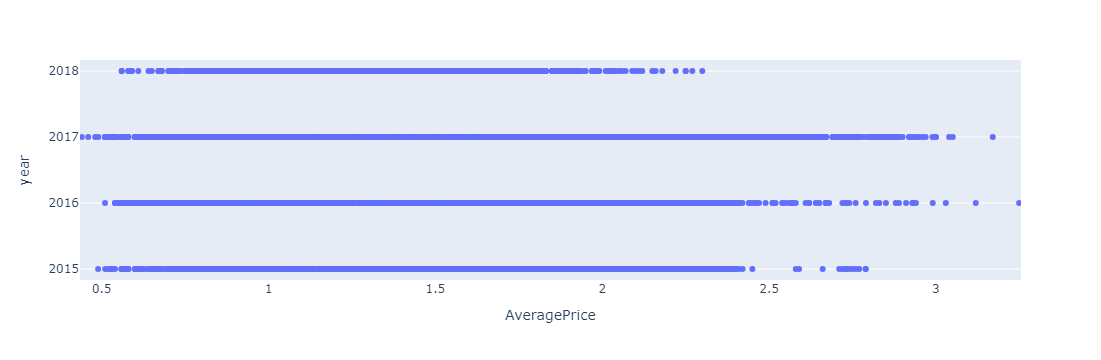

In [46]:
# Q8 : Create a strip plot to reflect Average Price for diffrent years.
px.strip(df,x = 'AveragePrice',y= 'year')

In [54]:
df3 = df.groupby(['year','Month'])['AveragePrice'].sum().reset_index()
df3

year  Month  AveragePrice
0   2015      1        589.70
1   2015      2        573.24
2   2015      3        735.47
3   2015      4        597.65
4   2015      5        726.13
5   2015      6        604.40
6   2015      7        608.88
7   2015      8        780.02
8   2015      9        626.03
9   2015     10        601.33
10  2015     11        718.53
11  2015     12        562.56
12  2016      1        669.70
13  2016      2        534.43
14  2016      3        528.86
15  2016      4        520.57
16  2016      5        647.85
17  2016      6        554.28
18  2016      7        756.72
19  2016      8        609.60
20  2016      9        616.84
21  2016     10        840.83
22  2016     11        669.61
23  2016     12        568.51
24  2017      1        689.85
25  2017      2        524.79
26  2017      3        604.34
27  2017      4        811.41
28  2017      5        662.08
29  2017      6        664.52
30  2017      7        845.06
31  2017      8        733.95
32  2017      9        795.29
33  2017     10        946.32
34  2017     11        655.47
35  2017     12        736.48
36  2018      1        599.37
37  2018      2        569.68
38  2018      3        577.35

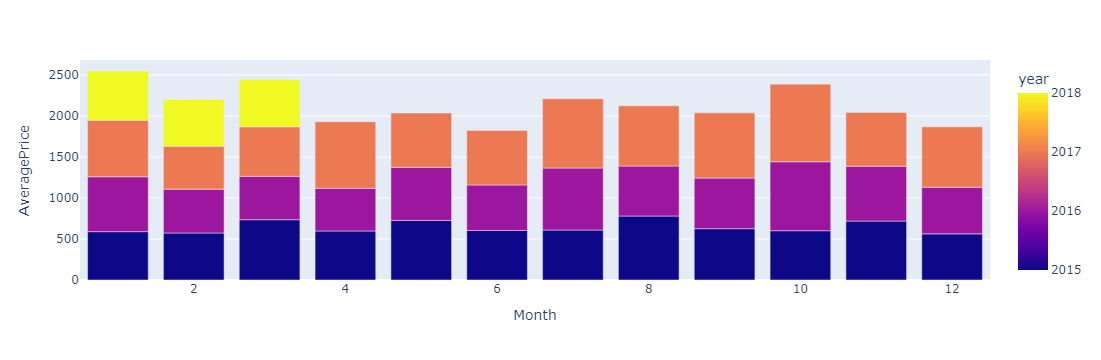

In [70]:
# Q9 : Create bar chart group for each year, reflects Average Price in each month 
px.bar(df3,x='Month', y = 'AveragePrice',color ='year')